# K-Means Clustering

In this notebook we will create some synthetic data sets to see how k-means works in different scenarios.


In [1]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

## A first example

First, we'll create data using a function that generates [gaussian blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

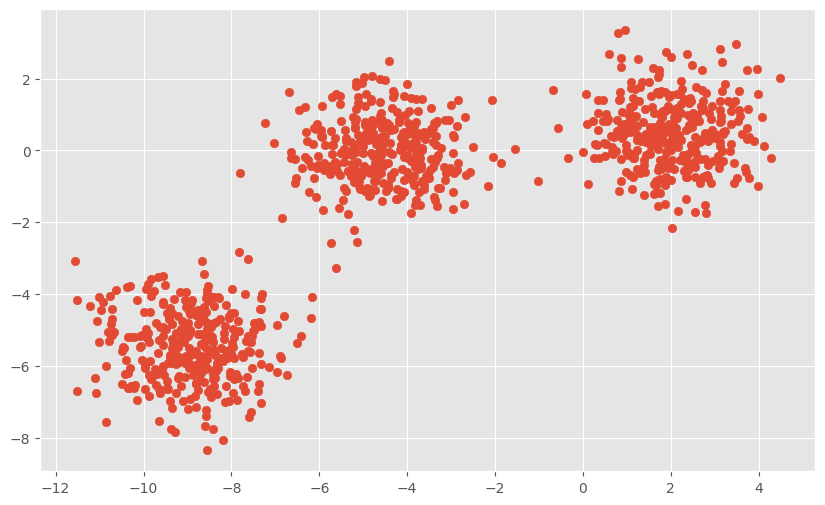

In [2]:
# make_blobs generates gaussian blobs, we create 3 blobs
n_samples = 1000
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1,random_state=random_state)

# plot data
plt.scatter(X[:, 0], X[:, 1],  marker="o");

If k-means is any good it should get this right!!!  

I will also assume I know a-priori that there are 3 clusters.

Now we run the scikit-learn KMeans implementation with function parameters
* `n_clusters`: $k=3$ clusters
* `n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of the total intra-cluster distance. Defaults to 10.
* `init`: = "k++" this does a "smart" initial placement of the clusters.
* `max_iter`: only one iteration



The clusters are plotted using color.

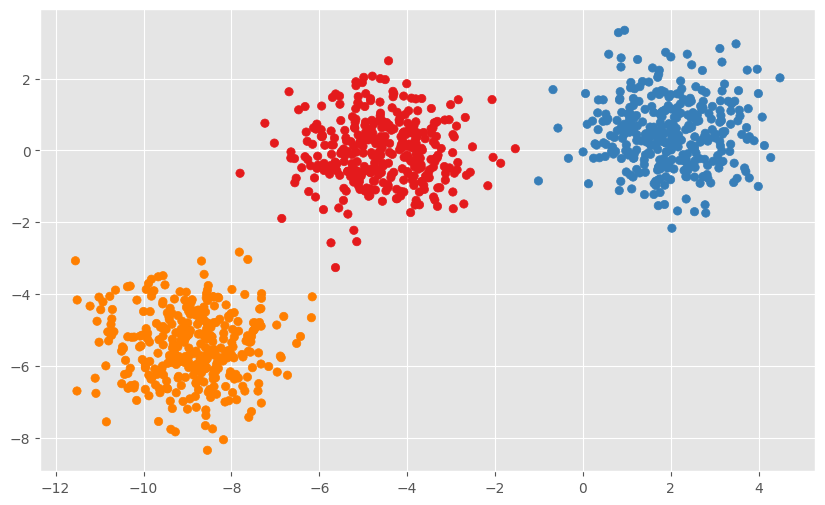

In [3]:
y_pred = KMeans(n_clusters=3, n_init=1, init='random', max_iter=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cmap);

**Note:** Yay for k-means!  It gets this easy problem correct

Go Back and check the impact of increasing the std. deviation of the clusters...

play around with blob numbers, cluster numbers, etc...

## More complicated datasets

Lets see how k-means dies for blobs that are spread out and have different densities:

### Varying Density and Size

Lets see how k-means dies for blobs that are spread out and have different densities:

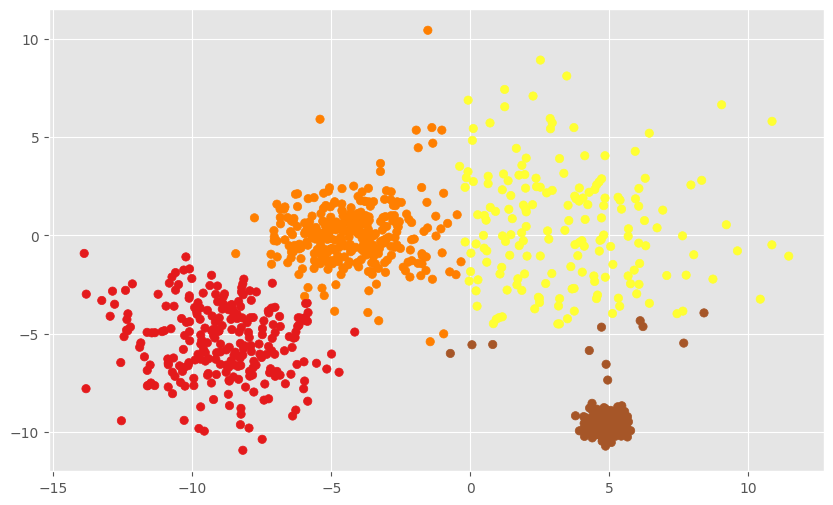

In [4]:
X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=[1.9, 1.2, 3.5, 0.4], random_state=random_state)

# Unevenly spread blobs
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Here, we seem to have some problems - because of our distance measure, some points that we'd consider as part of the "big" cluster are assigned to the denser clusters.

### Non-blob point clouds

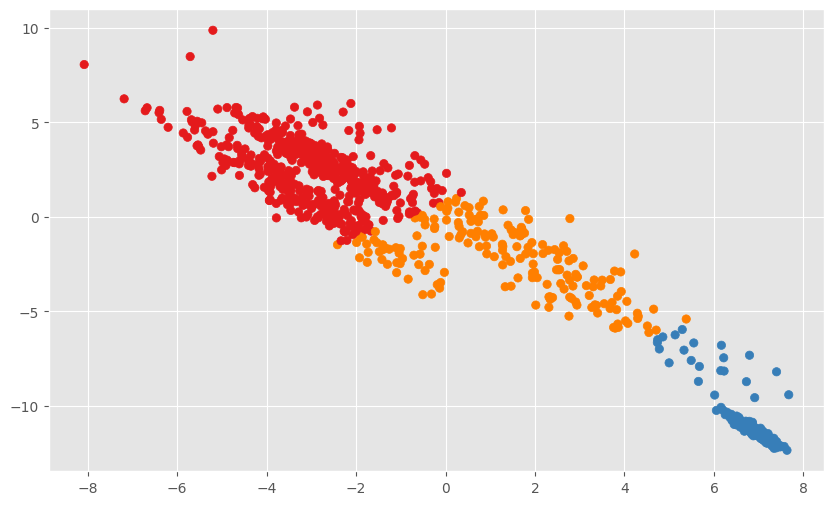

In [5]:
# Non-blob distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,  marker="o", cmap=cmap);

Here we see a clear weakness of k-means, it doesn't work well for non-spherical (_anisotropic_) point clouds.

## Choosing k in k-means
$k$-means is very sensitive to the choice of the parameter, $k$

Here, we under-estimate *k*.  True k=5, but we guess

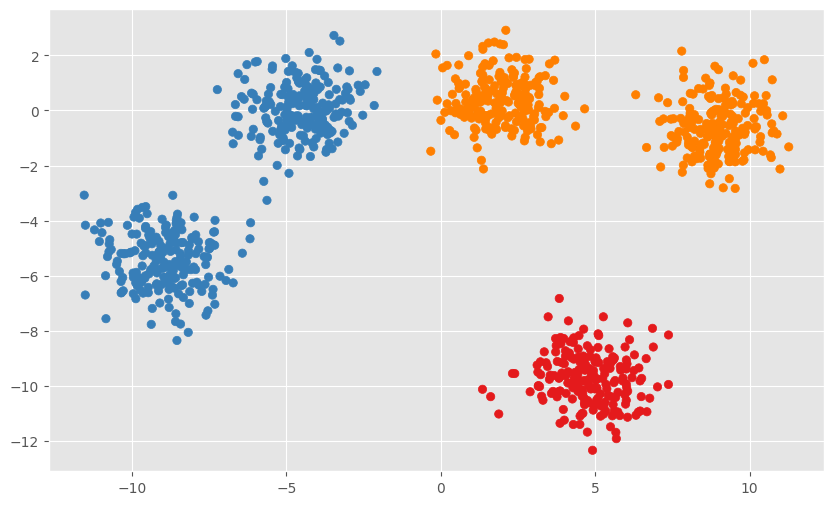

In [6]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)

y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Over-estimation is similarily problematic.

In [ ]:
X, y = make_blobs(n_samples=n_samples, centers=5, random_state=random_state)
y_pred = KMeans(n_clusters=7).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off.
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance.

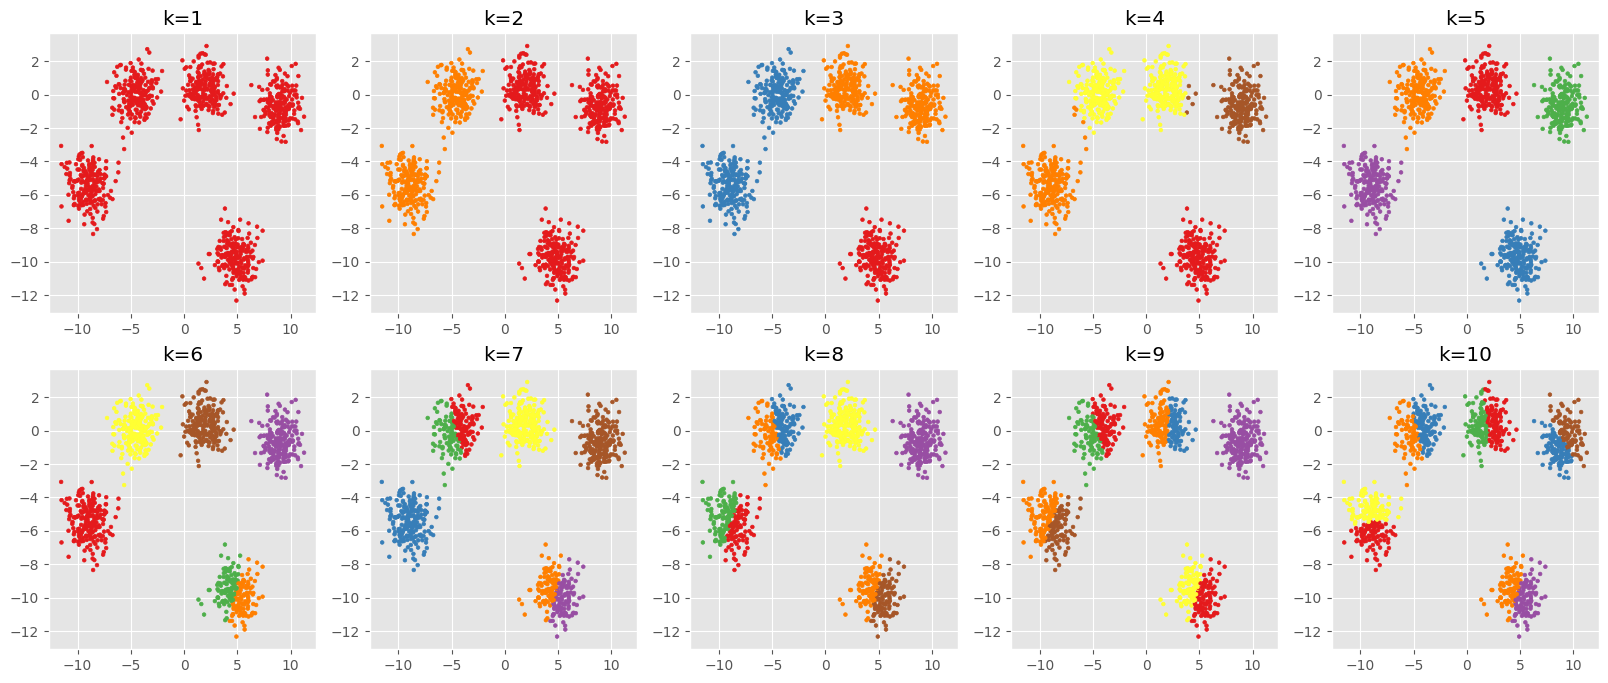

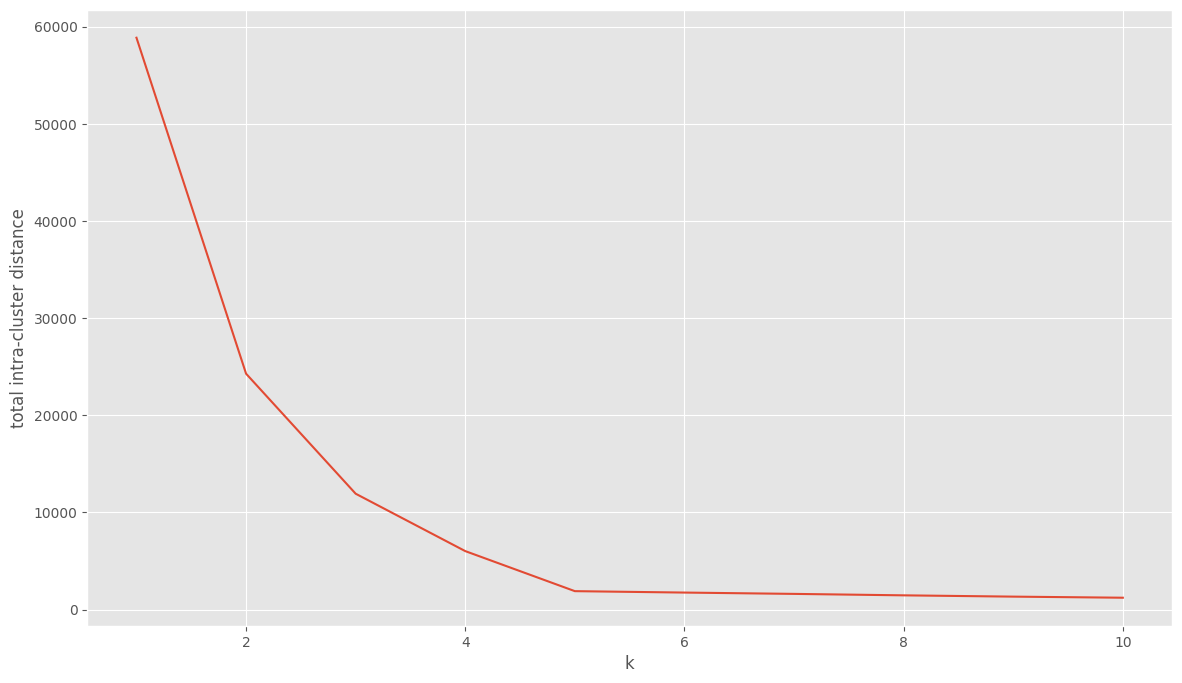

In [7]:
# clustering for k = 1 to k = 10


X, y = make_blobs(n_samples=n_samples, centers=5, cluster_std=1.0, random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=[1.7, 1, 3, 1.4], random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=6, cluster_std=[2,2,2,2,2,2], random_state=random_state)


ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))

for k in ks:
    model = KMeans(n_clusters=k,n_init=10)
    y_pred = model.fit_predict(X)
    scores.append(-model.score(X))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))


fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

We can see that the total intra-cluster distance is large for $k = 1$ and decreases as we increase $k$, until $k=5$, after which it tapers of and gets only marginally smaller. This indicates that $k=5$ is a good choice.  This is referred to as the *"elbow"* in the plot, and this is called the "elbow method" for selecting $k$.  But it is very imprecise!  🤷

Most real-world data sets do not have a well-defined elbow.

Try this with increasing cluster_std!!!!